In [1]:
import random 
import pandas as pd
import numpy as np
import csv
from pandasql import sqldf
import statistics as stat
from statistics import mean
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.stats import lognorm
from scipy.stats import chi2

In [2]:
# Import Buxton_Challenge_Data.csv for a year's worth of data 
file1 = 'Buxton_Challenge_Data.csv'
buxtonFile = pd.read_csv(file1, sep = ',')

In [3]:
# Create a DataFrame
dfBuxtonData = sqldf('''SELECT * FROM buxtonFile;''')
dfBuxtonData.head(70)

,SID,OPEN_YEAR,DENSITY_CLASS,REGION,STATE,SQFT,SALES_2016,AGE_ADULT18P_8TO,AGE_ADULT18P_16TO,AGE_BABYBOOM5069_8TO,...,XRACE_WHTHH_1RO,XRACE_WHTHH_8TO,XRACE_WHTHH_16TO,XRACE_WHTPOP_1RO,XRACE_WHTPOP_8TO,XRACE_WHTPOP_16TO,CUSTOMER_VALUE,CUSTOMER_VALUE_QUAL,CUSTOMER_VALUE_W,CUSTOMER_VALUE_W_QUAL
0,21266491,NaN,2,SA,WV,44312.0,NaN,12577,42856,4562,...,95.04,94.38,91.29,93.65,93.28,89.92,3262854.94,723.47,2629199.03,510.38
1,21266492,NaN,2,SA,WV,47425.0,NaN,22113,42658,7638,...,88.49,81.97,87.78,86.80,79.71,85.79,3745254.61,704.30,4714278.64,501.17
2,21266493,NaN,2,SA,WV,17710.0,NaN,10016,37535,3214,...,96.14,93.11,94.20,94.70,92.13,92.71,2767007.12,723.39,2259801.14,460.22
3,21266494,NaN,2,MA,PA,59989.0,NaN,22118,51705,7953,...,92.95,89.92,93.15,89.33,87.28,91.56,4615043.23,728.06,4933560.86,552.78
4,21266495,NaN,3,SA,WV,60720.0,NaN,32392,60289,10830,...,93.99,95.66,96.62,91.94,94.36,95.57,5234084.09,643.69,5956571.33,460.80
5,21266496,1983.0,2,MA,PA,52861.0,6585542.0,22452,62057,7866,...,94.95,91.82,94.09,94.28,89.81,92.62,5213824.66,800.61,2599706.69,503.14
6,21266497,1984.0,2,SA,MD,50399.0,7580096.0,23272,51235,7276,...,96.78,93.90,94.78,95.75,84.17,88.18,4235039.57,812.68,5430226.19,537.17
7,21266498,1985.0,2,SA,WV,45520.0,7538990.0,16522,39299,5693,...,96.04,95.03,95.91,94.65,93.82,95.01,3047761.34,682.62,3323540.34,450.89
8,21266499,1986.0,2,ENC,OH,53872.0,6917103.0,8465,57556,3237,...,95.62,95.13,94.61,94.63,93.82,91.26,3540146.55,713.33,4296301.15,493.88
9,21266500,1987.0,3,MA,PA,62109.0,8395815.0,25324,139069,8964,...,96.42,91.56,87.68,95.78,89.82,85.27,8887719.17,700.44,5641977.41,480.37


C:\Users\mckee\Anaconda3\lib\site-packages\seaborn\categorical.py:1324: RuntimeWarning: invalid value encountered in less
  off_low = points < low_gutter
C:\Users\mckee\Anaconda3\lib\site-packages\seaborn\categorical.py:1328: RuntimeWarning: invalid value encountered in greater
  off_high = points > high_gutter


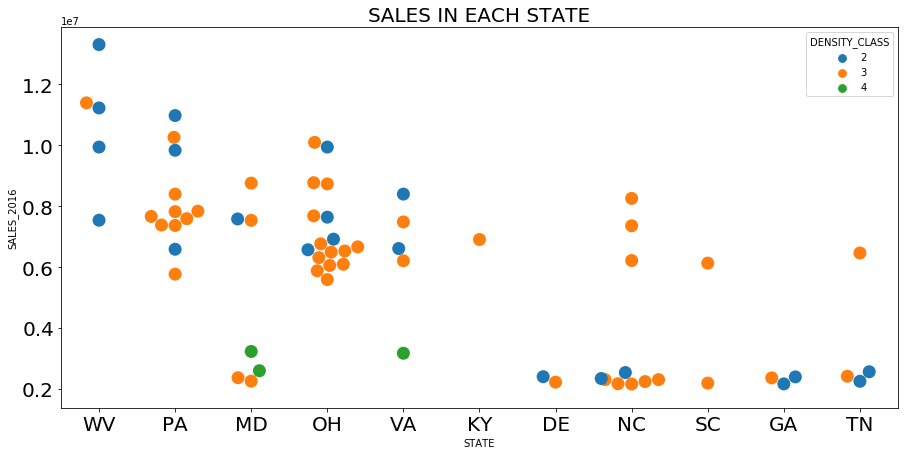

In [4]:
# Displays results based on outcome subtype and adoption results
buxtonResults = dfBuxtonData.groupby(['DENSITY_CLASS']).head(100)
plt.figure(figsize=(15,7))
g = sns.swarmplot(x='STATE', y='SALES_2016', hue='DENSITY_CLASS', 
                  data=buxtonResults, size=13)
g.tick_params(labelsize=20)
plt.title('SALES IN EACH STATE',fontsize=20)
plt.show()

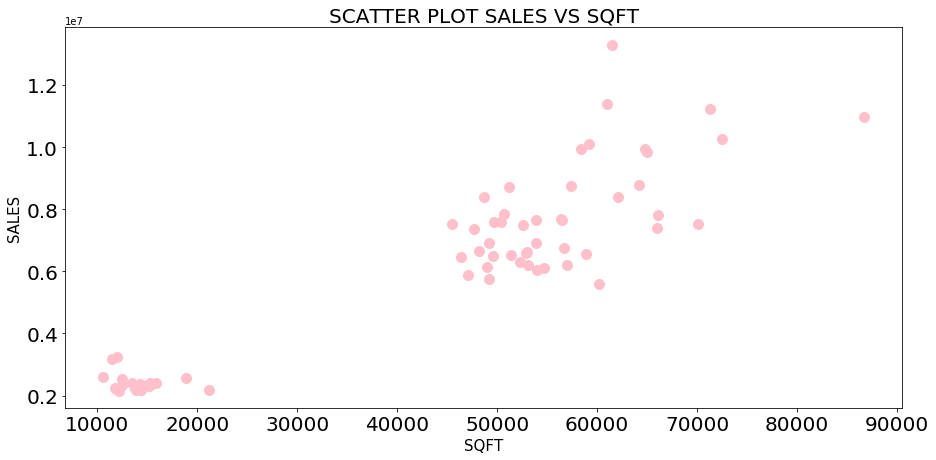

In [5]:
# Scatter plot of sales vs square footage
plt.figure(figsize=(15,7))
plt.scatter(dfBuxtonData['SQFT'].iloc[5:],dfBuxtonData['SALES_2016'].iloc[5:],s=100,marker='o',color='pink')
plt.title('SCATTER PLOT SALES VS SQFT',fontsize=20)
plt.xlabel('SQFT',fontsize=15)
plt.ylabel('SALES',fontsize=15)
plt.tick_params(labelsize=20)
plt.show()

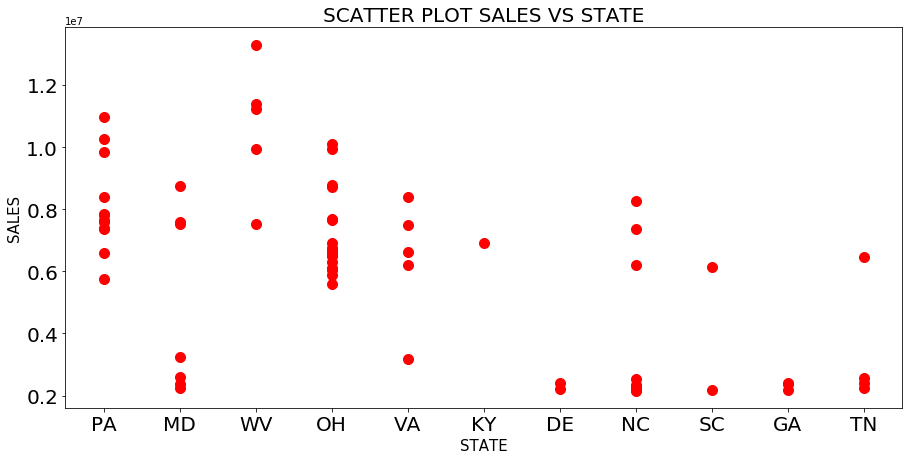

In [6]:
# Scatter plot of sales vs state
plt.figure(figsize=(15,7))
plt.scatter(dfBuxtonData['STATE'].iloc[5:],dfBuxtonData['SALES_2016'].iloc[5:],s=100,marker='o',color='red')
plt.title('SCATTER PLOT SALES VS STATE',fontsize=20)
plt.xlabel('STATE',fontsize=15)
plt.ylabel('SALES',fontsize=15)
plt.tick_params(labelsize=20)
plt.show()

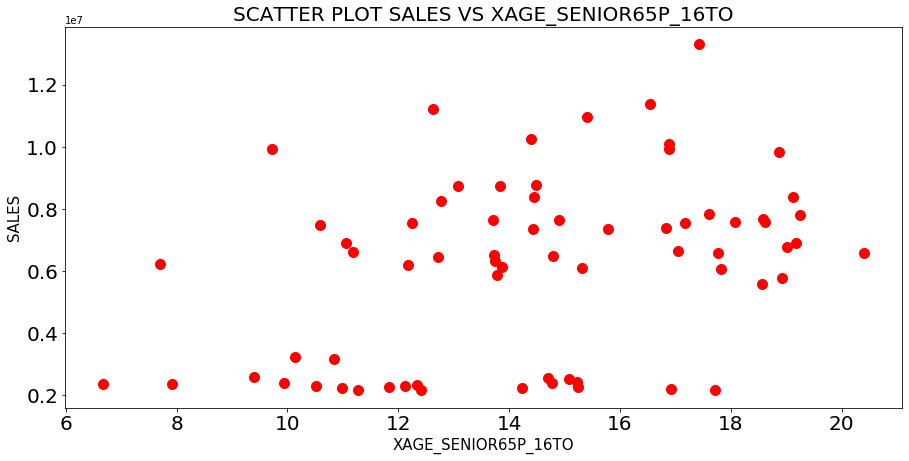

In [7]:
# Scatter plot of sales vs XAGE_SENIOR65P_16TO
plt.figure(figsize=(15,7))
plt.scatter(dfBuxtonData['XAGE_SENIOR65P_16TO'].iloc[5:],dfBuxtonData['SALES_2016'].iloc[5:],s=100,marker='o',color='red')
plt.title('SCATTER PLOT SALES VS XAGE_SENIOR65P_16TO',fontsize=20)
plt.xlabel('XAGE_SENIOR65P_16TO',fontsize=15)
plt.ylabel('SALES',fontsize=15)
plt.tick_params(labelsize=20)
plt.show()

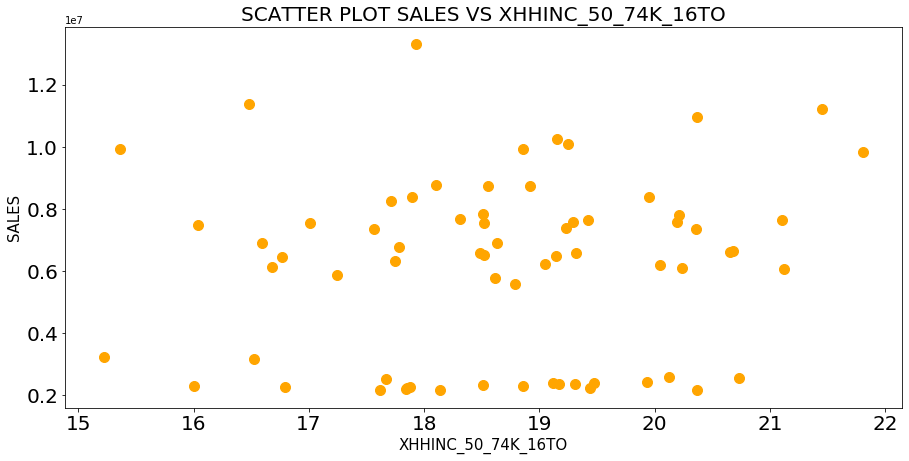

In [8]:
# Scatter plot of sales vs XHHINC_50_74K_16TO
plt.figure(figsize=(15,7))
plt.scatter(dfBuxtonData['XHHINC_50_74K_16TO'].iloc[5:],dfBuxtonData['SALES_2016'].iloc[5:],s=100,marker='o',color='orange')
plt.title('SCATTER PLOT SALES VS XHHINC_50_74K_16TO',fontsize=20)
plt.xlabel('XHHINC_50_74K_16TO',fontsize=15)
plt.ylabel('SALES',fontsize=15)
plt.tick_params(labelsize=20)
plt.show()

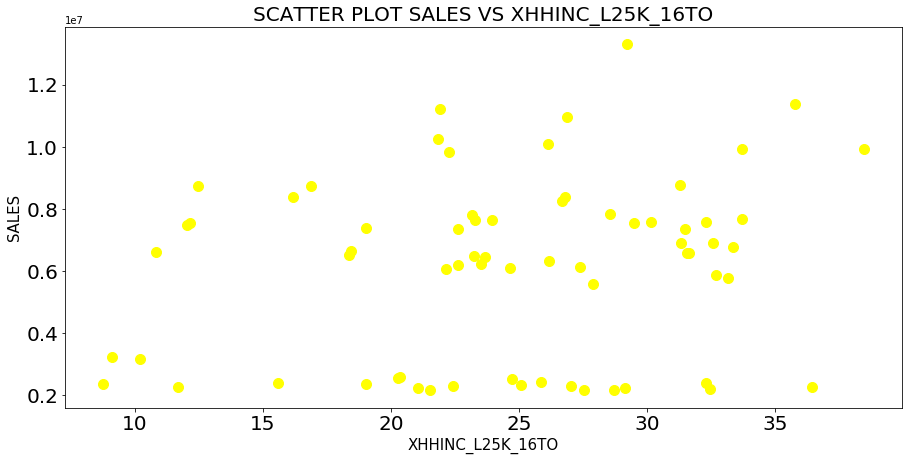

In [9]:
# Scatter plot of sales vs XHHINC_L25K_16TO
plt.figure(figsize=(15,7))
plt.scatter(dfBuxtonData['XHHINC_L25K_16TO'].iloc[5:],dfBuxtonData['SALES_2016'].iloc[5:],s=100,marker='o',color='yellow')
plt.title('SCATTER PLOT SALES VS XHHINC_L25K_16TO',fontsize=20)
plt.xlabel('XHHINC_L25K_16TO',fontsize=15)
plt.ylabel('SALES',fontsize=15)
plt.tick_params(labelsize=20)
plt.show()

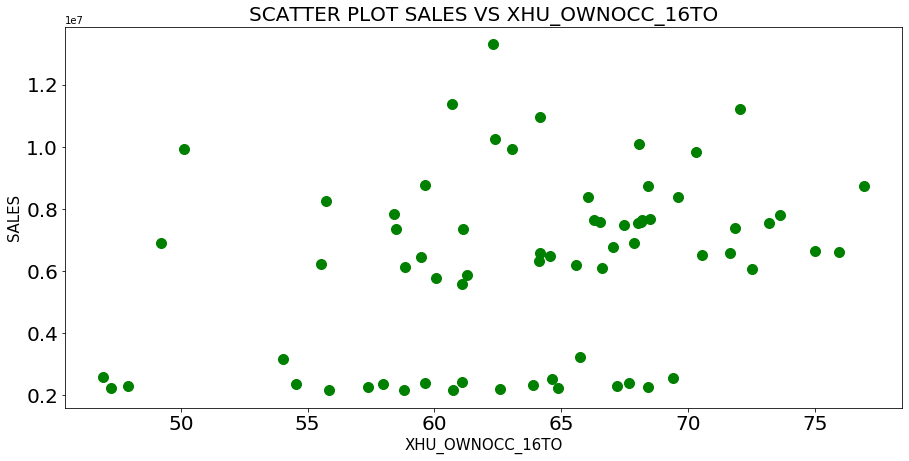

In [10]:
# Scatter plot of sales vs XHU_OWNOCC_16TO
plt.figure(figsize=(15,7))
plt.scatter(dfBuxtonData['XHU_OWNOCC_16TO'].iloc[5:],dfBuxtonData['SALES_2016'].iloc[5:],s=100,marker='o',color='green')
plt.title('SCATTER PLOT SALES VS XHU_OWNOCC_16TO',fontsize=20)
plt.xlabel('XHU_OWNOCC_16TO',fontsize=15)
plt.ylabel('SALES',fontsize=15)
plt.tick_params(labelsize=20)
plt.show()

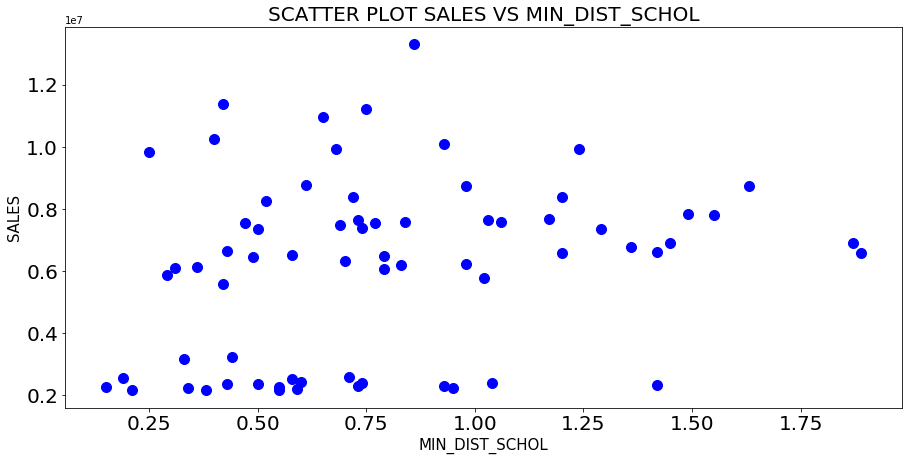

In [11]:
# Scatter plot of sales vs MIN_DIST_SCHOL
plt.figure(figsize=(15,7))
plt.scatter(dfBuxtonData['MIN_DIST_SCHOL'].iloc[5:],dfBuxtonData['SALES_2016'].iloc[5:],s=100,marker='o',color='blue')
plt.title('SCATTER PLOT SALES VS MIN_DIST_SCHOL',fontsize=20)
plt.xlabel('MIN_DIST_SCHOL',fontsize=15)
plt.ylabel('SALES',fontsize=15)
plt.tick_params(labelsize=20)
plt.show()

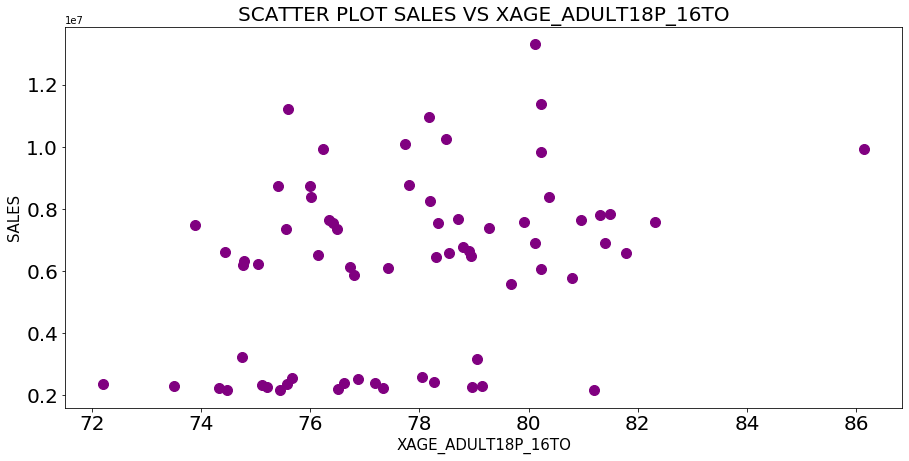

In [12]:
# Scatter plot of sales vs XAGE_ADULT18P_16TO
plt.figure(figsize=(15,7))
plt.scatter(dfBuxtonData['XAGE_ADULT18P_16TO'].iloc[5:],dfBuxtonData['SALES_2016'].iloc[5:],s=100,marker='o',color='purple')
plt.title('SCATTER PLOT SALES VS XAGE_ADULT18P_16TO',fontsize=20)
plt.xlabel('XAGE_ADULT18P_16TO',fontsize=15)
plt.ylabel('SALES',fontsize=15)
plt.tick_params(labelsize=20)
plt.show()

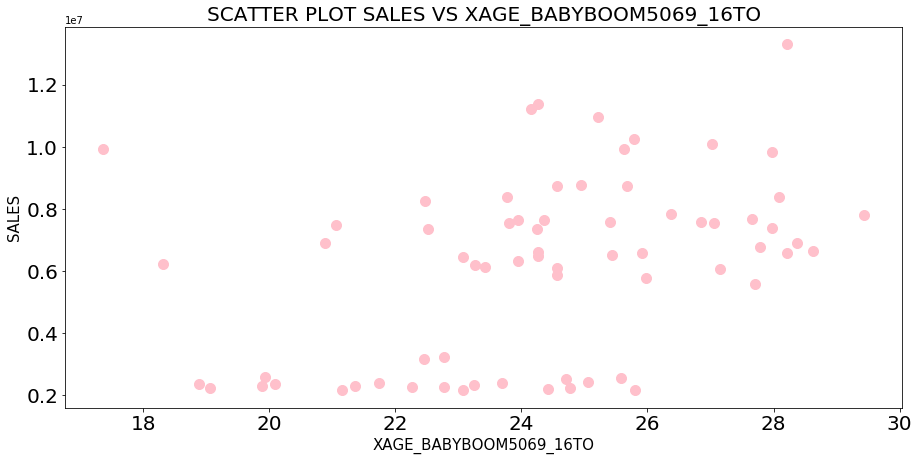

In [13]:
# Scatter plot of sales vs XAGE_BABYBOOM5069_16TO
plt.figure(figsize=(15,7))
plt.scatter(dfBuxtonData['XAGE_BABYBOOM5069_16TO'].iloc[5:],dfBuxtonData['SALES_2016'].iloc[5:],s=100,marker='o',color='pink')
plt.title('SCATTER PLOT SALES VS XAGE_BABYBOOM5069_16TO',fontsize=20)
plt.xlabel('XAGE_BABYBOOM5069_16TO',fontsize=15)
plt.ylabel('SALES',fontsize=15)
plt.tick_params(labelsize=20)
plt.show()

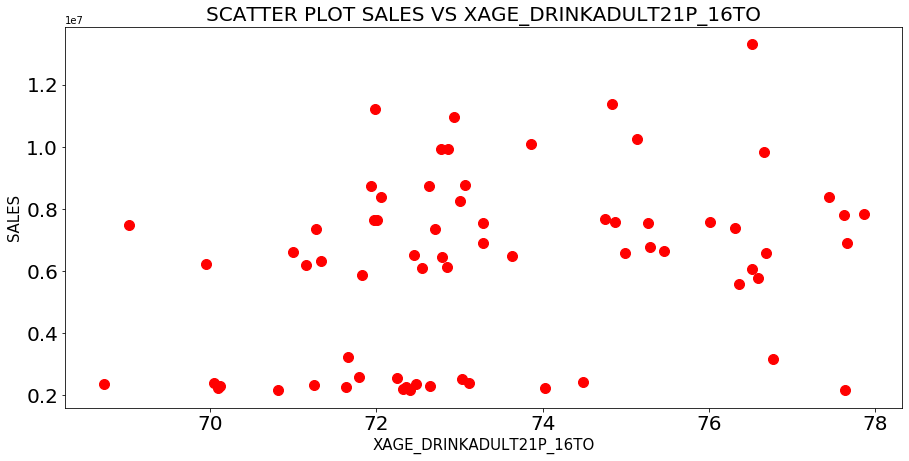

In [14]:
# Scatter plot of sales vs XAGE_DRINKADULT21P_16TO
plt.figure(figsize=(15,7))
plt.scatter(dfBuxtonData['XAGE_DRINKADULT21P_16TO'].iloc[5:],dfBuxtonData['SALES_2016'].iloc[5:],s=100,marker='o',color='red')
plt.title('SCATTER PLOT SALES VS XAGE_DRINKADULT21P_16TO',fontsize=20)
plt.xlabel('XAGE_DRINKADULT21P_16TO',fontsize=15)
plt.ylabel('SALES',fontsize=15)
plt.tick_params(labelsize=20)
plt.show()

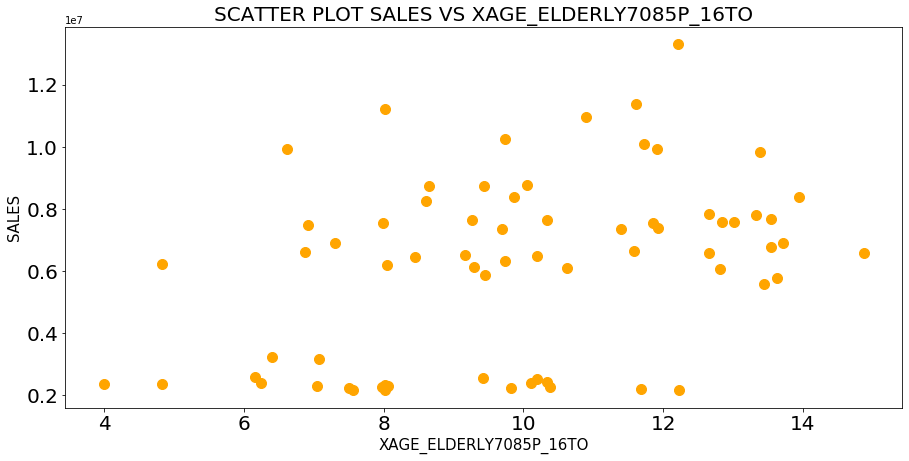

In [15]:
# Scatter plot of sales vs XAGE_ELDERLY7085P_16TO
plt.figure(figsize=(15,7))
plt.scatter(dfBuxtonData['XAGE_ELDERLY7085P_16TO'].iloc[5:],dfBuxtonData['SALES_2016'].iloc[5:],s=100,marker='o',color='orange')
plt.title('SCATTER PLOT SALES VS XAGE_ELDERLY7085P_16TO',fontsize=20)
plt.xlabel('XAGE_ELDERLY7085P_16TO',fontsize=15)
plt.ylabel('SALES',fontsize=15)
plt.tick_params(labelsize=20)
plt.show()

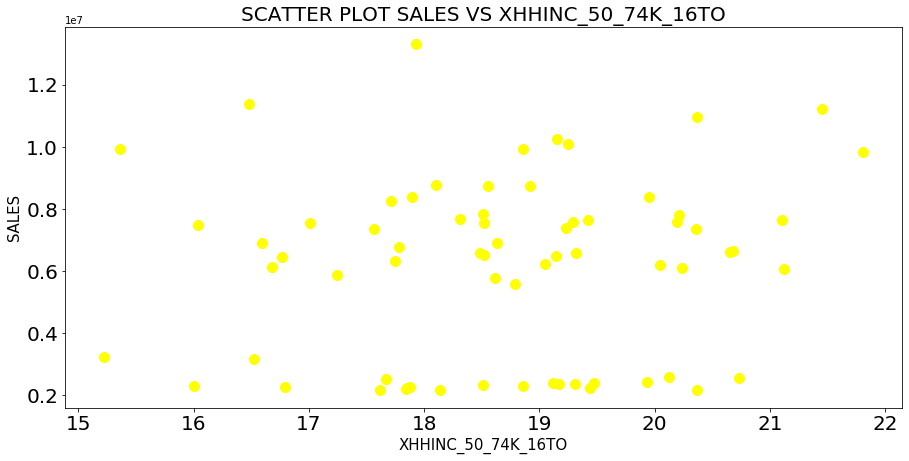

In [16]:
# Scatter plot of sales vs XHHINC_50_74K_16TO
plt.figure(figsize=(15,7))
plt.scatter(dfBuxtonData['XHHINC_50_74K_16TO'].iloc[5:],dfBuxtonData['SALES_2016'].iloc[5:],s=100,marker='o',color='yellow')
plt.title('SCATTER PLOT SALES VS XHHINC_50_74K_16TO',fontsize=20)
plt.xlabel('XHHINC_50_74K_16TO',fontsize=15)
plt.ylabel('SALES',fontsize=15)
plt.tick_params(labelsize=20)
plt.show()

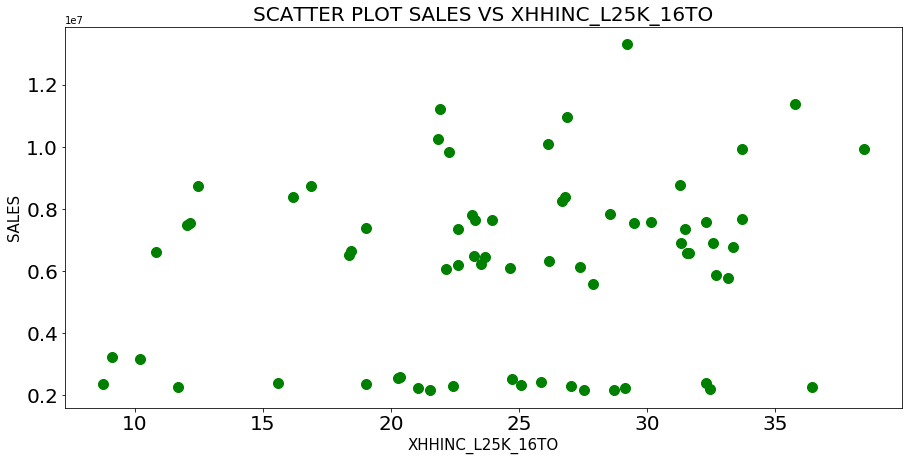

In [17]:
# Scatter plot of sales vs XHHINC_L25K_16TO
plt.figure(figsize=(15,7))
plt.scatter(dfBuxtonData['XHHINC_L25K_16TO'].iloc[5:],dfBuxtonData['SALES_2016'].iloc[5:],s=100,marker='o',color='green')
plt.title('SCATTER PLOT SALES VS XHHINC_L25K_16TO',fontsize=20)
plt.xlabel('XHHINC_L25K_16TO',fontsize=15)
plt.ylabel('SALES',fontsize=15)
plt.tick_params(labelsize=20)
plt.show()

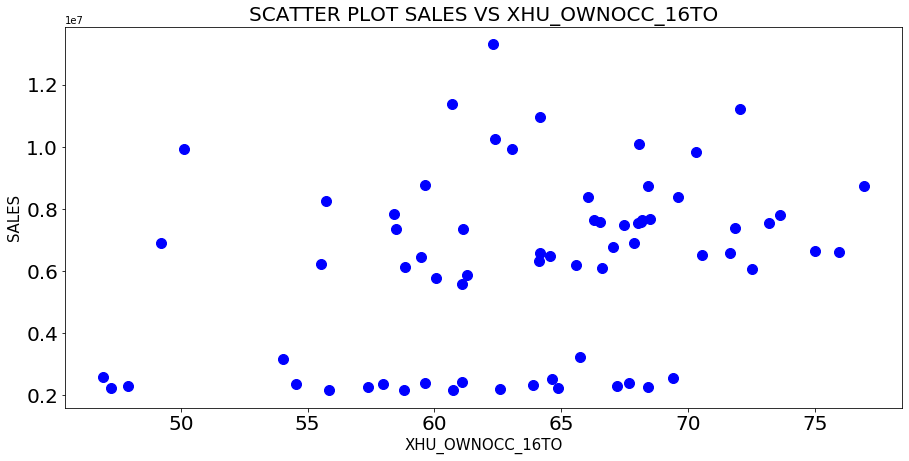

In [18]:
# Scatter plot of sales vs XHU_OWNOCC_16TO
plt.figure(figsize=(15,7))
plt.scatter(dfBuxtonData['XHU_OWNOCC_16TO'].iloc[5:],dfBuxtonData['SALES_2016'].iloc[5:],s=100,marker='o',color='blue')
plt.title('SCATTER PLOT SALES VS XHU_OWNOCC_16TO',fontsize=20)
plt.xlabel('XHU_OWNOCC_16TO',fontsize=15)
plt.ylabel('SALES',fontsize=15)
plt.tick_params(labelsize=20)
plt.show()

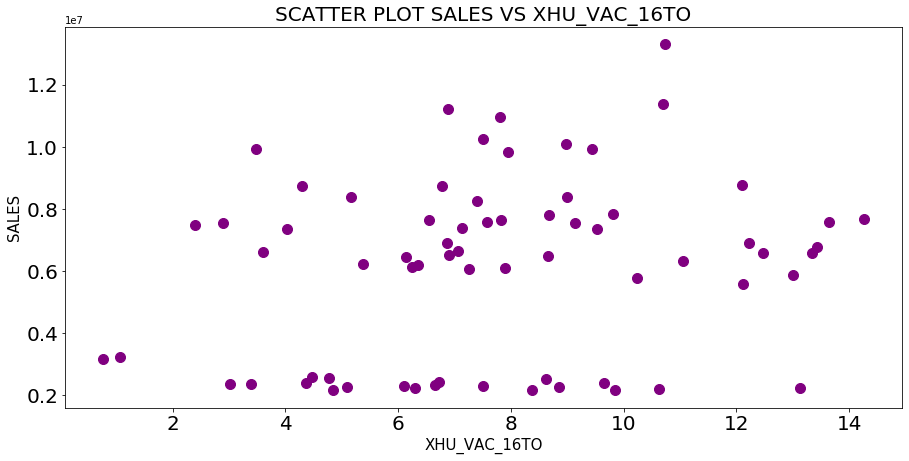

In [19]:
# Scatter plot of sales vs XHU_VAC_16TO
plt.figure(figsize=(15,7))
plt.scatter(dfBuxtonData['XHU_VAC_16TO'].iloc[5:],dfBuxtonData['SALES_2016'].iloc[5:],s=100,marker='o',color='purple')
plt.title('SCATTER PLOT SALES VS XHU_VAC_16TO',fontsize=20)
plt.xlabel('XHU_VAC_16TO',fontsize=15)
plt.ylabel('SALES',fontsize=15)
plt.tick_params(labelsize=20)
plt.show()

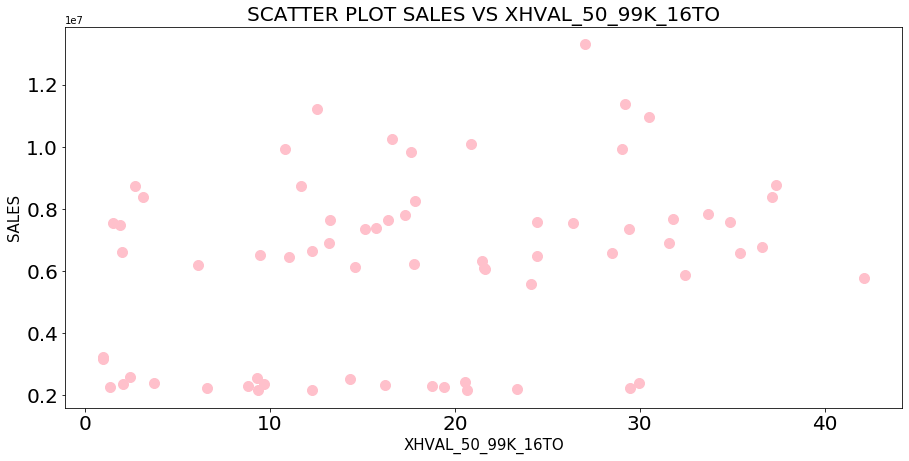

In [20]:
# Scatter plot of sales vs XHVAL_50_99K_16TO
plt.figure(figsize=(15,7))
plt.scatter(dfBuxtonData['XHVAL_50_99K_16TO'].iloc[5:],dfBuxtonData['SALES_2016'].iloc[5:],s=100,marker='o',color='pink')
plt.title('SCATTER PLOT SALES VS XHVAL_50_99K_16TO',fontsize=20)
plt.xlabel('XHVAL_50_99K_16TO',fontsize=15)
plt.ylabel('SALES',fontsize=15)
plt.tick_params(labelsize=20)
plt.show()

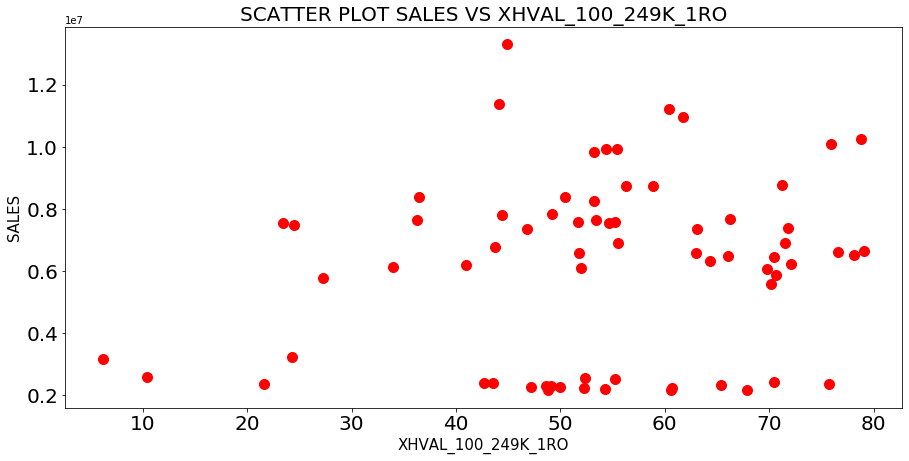

In [21]:
# Scatter plot of sales vs XHVAL_100_249K_1RO
plt.figure(figsize=(15,7))
plt.scatter(dfBuxtonData['XHVAL_100_249K_1RO'].iloc[5:],dfBuxtonData['SALES_2016'].iloc[5:],s=100,marker='o',color='red')
plt.title('SCATTER PLOT SALES VS XHVAL_100_249K_1RO',fontsize=20)
plt.xlabel('XHVAL_100_249K_1RO',fontsize=15)
plt.ylabel('SALES',fontsize=15)
plt.tick_params(labelsize=20)
plt.show()

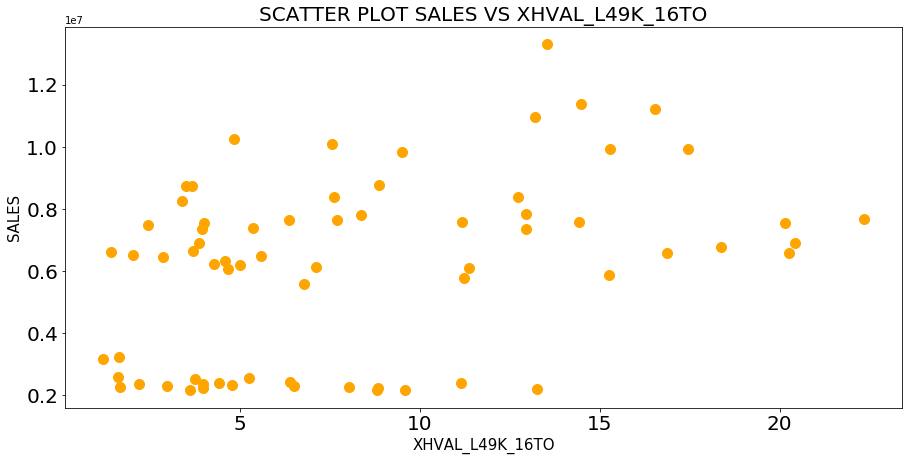

In [22]:
# Scatter plot of sales vs XHVAL_L49K_16TO
plt.figure(figsize=(15,7))
plt.scatter(dfBuxtonData['XHVAL_L49K_16TO'].iloc[5:],dfBuxtonData['SALES_2016'].iloc[5:],s=100,marker='o',color='orange')
plt.title('SCATTER PLOT SALES VS XHVAL_L49K_16TO',fontsize=20)
plt.xlabel('XHVAL_L49K_16TO',fontsize=15)
plt.ylabel('SALES',fontsize=15)
plt.tick_params(labelsize=20)
plt.show()

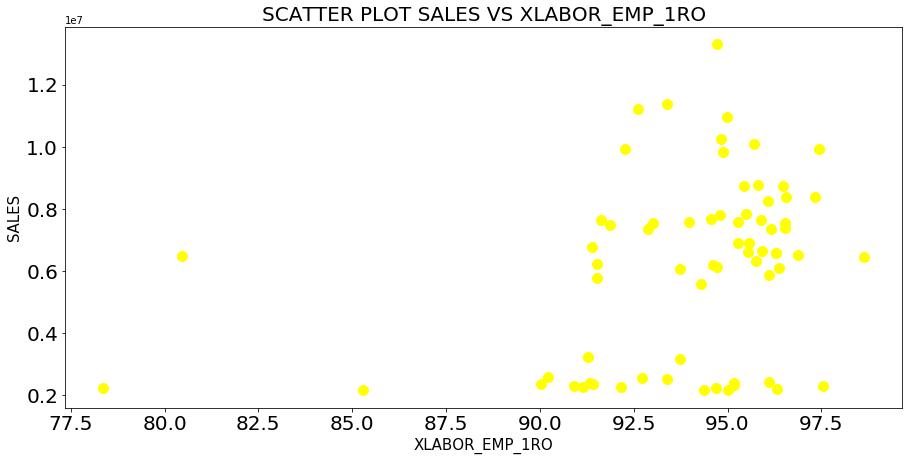

In [23]:
# Scatter plot of sales vs XLABOR_EMP_1RO
plt.figure(figsize=(15,7))
plt.scatter(dfBuxtonData['XLABOR_EMP_1RO'].iloc[5:],dfBuxtonData['SALES_2016'].iloc[5:],s=100,marker='o',color='yellow')
plt.title('SCATTER PLOT SALES VS XLABOR_EMP_1RO',fontsize=20)
plt.xlabel('XLABOR_EMP_1RO',fontsize=15)
plt.ylabel('SALES',fontsize=15)
plt.tick_params(labelsize=20)
plt.show()

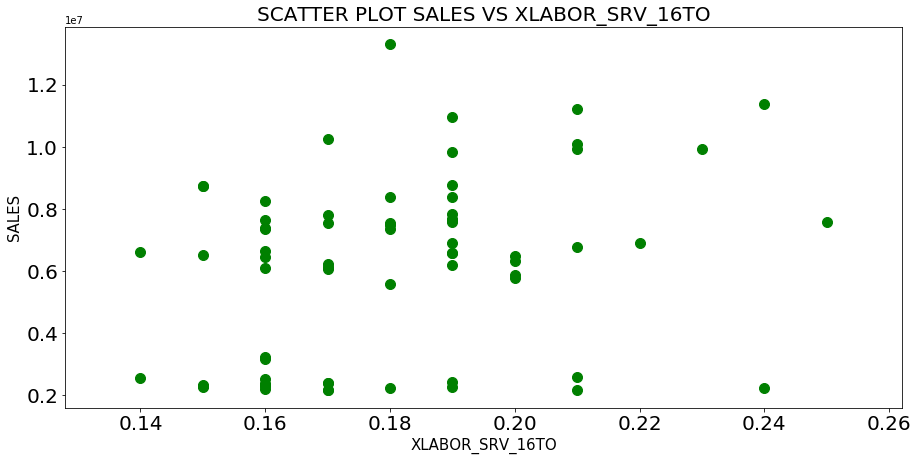

In [24]:
# Scatter plot of sales vs XLABOR_SRV_16TO
plt.figure(figsize=(15,7))
plt.scatter(dfBuxtonData['XLABOR_SRV_16TO'].iloc[5:],dfBuxtonData['SALES_2016'].iloc[5:],s=100,marker='o',color='green')
plt.title('SCATTER PLOT SALES VS XLABOR_SRV_16TO',fontsize=20)
plt.xlabel('XLABOR_SRV_16TO',fontsize=15)
plt.ylabel('SALES',fontsize=15)
plt.tick_params(labelsize=20)
plt.show()

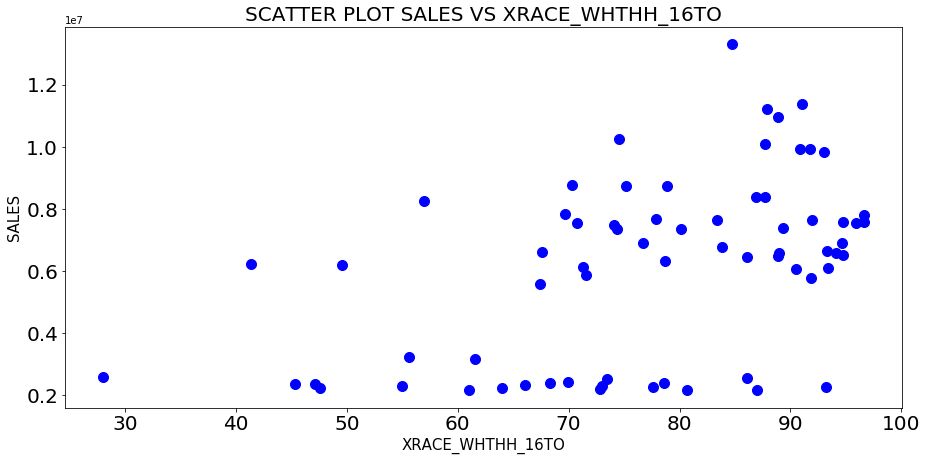

In [25]:
# Scatter plot of sales vs XRACE_WHTHH_16TO
plt.figure(figsize=(15,7))
plt.scatter(dfBuxtonData['XRACE_WHTHH_16TO'].iloc[5:],dfBuxtonData['SALES_2016'].iloc[5:],s=100,marker='o',color='blue')
plt.title('SCATTER PLOT SALES VS XRACE_WHTHH_16TO',fontsize=20)
plt.xlabel('XRACE_WHTHH_16TO',fontsize=15)
plt.ylabel('SALES',fontsize=15)
plt.tick_params(labelsize=20)
plt.show()

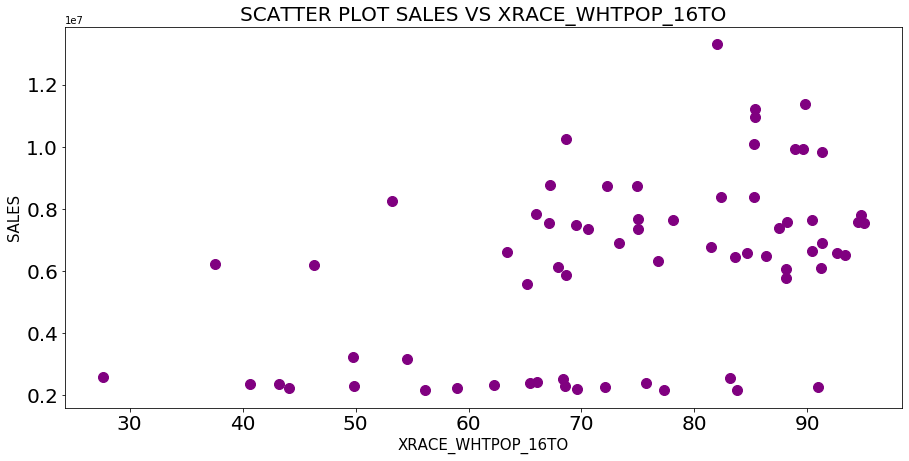

In [26]:
# Scatter plot of sales vs XRACE_WHTPOP_16TO
plt.figure(figsize=(15,7))
plt.scatter(dfBuxtonData['XRACE_WHTPOP_16TO'].iloc[5:],dfBuxtonData['SALES_2016'].iloc[5:],s=100,marker='o',color='purple')
plt.title('SCATTER PLOT SALES VS XRACE_WHTPOP_16TO',fontsize=20)
plt.xlabel('XRACE_WHTPOP_16TO',fontsize=15)
plt.ylabel('SALES',fontsize=15)
plt.tick_params(labelsize=20)
plt.show()

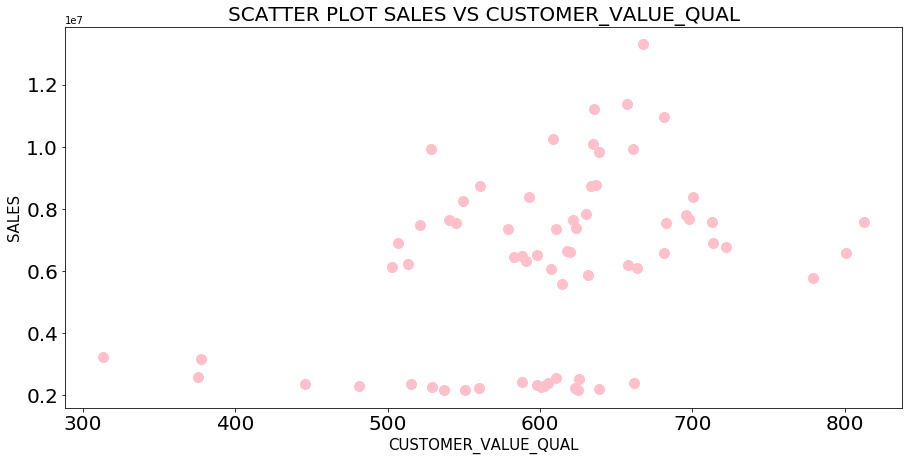

In [27]:
# Scatter plot of sales vs CUSTOMER_VALUE_QUAL
plt.figure(figsize=(15,7))
plt.scatter(dfBuxtonData['CUSTOMER_VALUE_QUAL'].iloc[5:],dfBuxtonData['SALES_2016'].iloc[5:],s=100,marker='o',color='pink')
plt.title('SCATTER PLOT SALES VS CUSTOMER_VALUE_QUAL',fontsize=20)
plt.xlabel('CUSTOMER_VALUE_QUAL',fontsize=15)
plt.ylabel('SALES',fontsize=15)
plt.tick_params(labelsize=20)
plt.show()

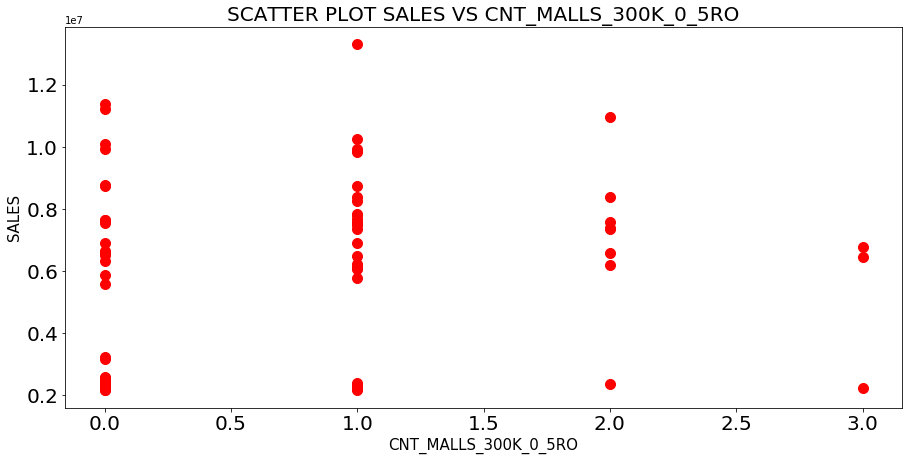

In [28]:
# Scatter plot of sales vs CNT_MALLS_300K_0_5RO
plt.figure(figsize=(15,7))
plt.scatter(dfBuxtonData['CNT_MALLS_300K_0_5RO'].iloc[5:],dfBuxtonData['SALES_2016'].iloc[5:],s=100,marker='o',color='red')
plt.title('SCATTER PLOT SALES VS CNT_MALLS_300K_0_5RO',fontsize=20)
plt.xlabel('CNT_MALLS_300K_0_5RO',fontsize=15)
plt.ylabel('SALES',fontsize=15)
plt.tick_params(labelsize=20)
plt.show()

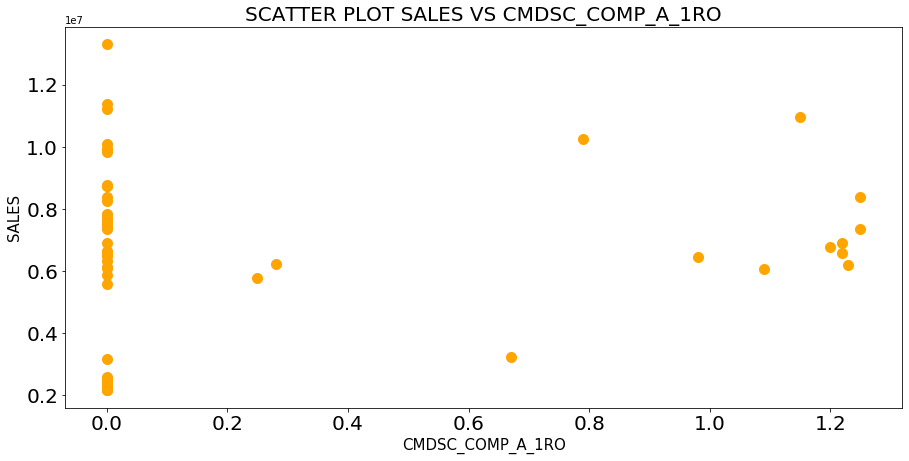

In [29]:
# Scatter plot of sales vs CMDSC_COMP_A_1RO
plt.figure(figsize=(15,7))
plt.scatter(dfBuxtonData['CMDSC_COMP_A_1RO'].iloc[5:],dfBuxtonData['SALES_2016'].iloc[5:],s=100,marker='o',color='orange')
plt.title('SCATTER PLOT SALES VS CMDSC_COMP_A_1RO',fontsize=20)
plt.xlabel('CMDSC_COMP_A_1RO',fontsize=15)
plt.ylabel('SALES',fontsize=15)
plt.tick_params(labelsize=20)
plt.show()

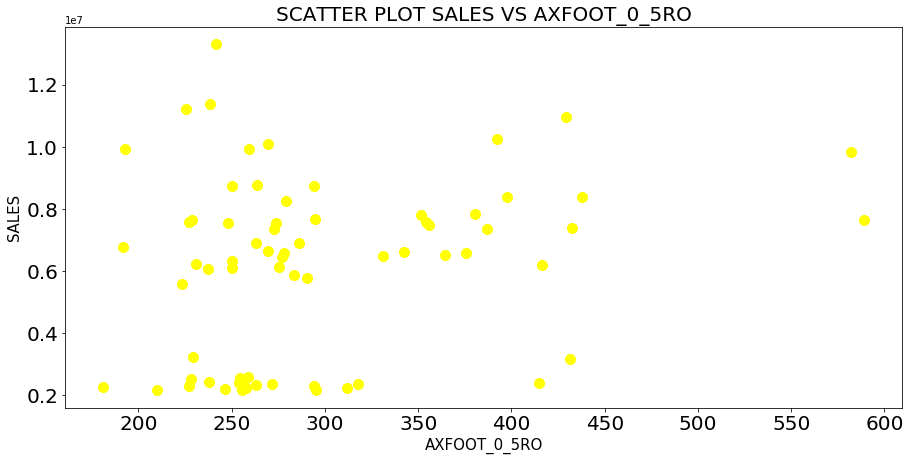

In [30]:
# Scatter plot of sales vs AXFOOT_0_5RO
plt.figure(figsize=(15,7))
plt.scatter(dfBuxtonData['AXFOOT_0_5RO'].iloc[5:],dfBuxtonData['SALES_2016'].iloc[5:],s=100,marker='o',color='yellow')
plt.title('SCATTER PLOT SALES VS AXFOOT_0_5RO',fontsize=20)
plt.xlabel('AXFOOT_0_5RO',fontsize=15)
plt.ylabel('SALES',fontsize=15)
plt.tick_params(labelsize=20)
plt.show()

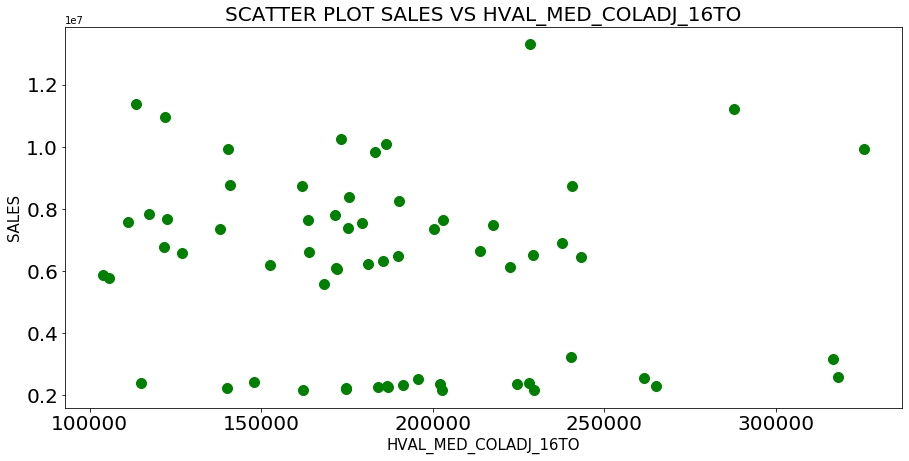

In [70]:
# Scatter plot of sales vs LOR_AVG_16TO
plt.figure(figsize=(15,7))
plt.scatter(dfBuxtonData['HVAL_MED_COLADJ_16TO'].iloc[5:],dfBuxtonData['SALES_2016'].iloc[5:],s=100,marker='o',color='green')
plt.title('SCATTER PLOT SALES VS HVAL_MED_COLADJ_16TO',fontsize=20)
plt.xlabel('HVAL_MED_COLADJ_16TO',fontsize=15)
plt.ylabel('SALES',fontsize=15)
plt.tick_params(labelsize=20)
plt.show()

In [32]:
# Remove nulls (if any)
dfBuxtonData = dfBuxtonData[5:].fillna(method='ffill')
dfBuxtonData.head(90)

,SID,OPEN_YEAR,DENSITY_CLASS,REGION,STATE,SQFT,SALES_2016,AGE_ADULT18P_8TO,AGE_ADULT18P_16TO,AGE_BABYBOOM5069_8TO,...,XRACE_WHTHH_1RO,XRACE_WHTHH_8TO,XRACE_WHTHH_16TO,XRACE_WHTPOP_1RO,XRACE_WHTPOP_8TO,XRACE_WHTPOP_16TO,CUSTOMER_VALUE,CUSTOMER_VALUE_QUAL,CUSTOMER_VALUE_W,CUSTOMER_VALUE_W_QUAL
5,21266496,1983.0,2,MA,PA,52861.0,6585542.0,22452,62057,7866,...,94.95,91.82,94.09,94.28,89.81,92.62,5213824.66,800.61,2599706.69,503.14
6,21266497,1984.0,2,SA,MD,50399.0,7580096.0,23272,51235,7276,...,96.78,93.90,94.78,95.75,84.17,88.18,4235039.57,812.68,5430226.19,537.17
7,21266498,1985.0,2,SA,WV,45520.0,7538990.0,16522,39299,5693,...,96.04,95.03,95.91,94.65,93.82,95.01,3047761.34,682.62,3323540.34,450.89
8,21266499,1986.0,2,ENC,OH,53872.0,6917103.0,8465,57556,3237,...,95.62,95.13,94.61,94.63,93.82,91.26,3540146.55,713.33,4296301.15,493.88
9,21266500,1987.0,3,MA,PA,62109.0,8395815.0,25324,139069,8964,...,96.42,91.56,87.68,95.78,89.82,85.27,8887719.17,700.44,5641977.41,480.37
10,21266501,1988.0,2,ENC,OH,53838.0,7638873.0,39237,111330,8141,...,84.15,87.36,91.96,82.05,85.09,90.40,6169111.00,539.99,5241580.63,422.46
11,21266502,1989.0,2,SA,WV,61438.0,13304391.0,10577,57136,3577,...,88.70,87.39,84.71,85.27,84.43,82.01,3823354.43,667.41,7484507.64,488.29
12,21266503,1989.0,3,MA,PA,72536.0,10259462.0,48700,192368,15530,...,72.03,64.57,74.58,66.04,57.40,68.63,11579621.78,608.68,15928773.90,446.82
13,21266504,1990.0,3,MA,PA,56502.0,7662741.0,23609,126540,7799,...,88.97,88.82,83.41,85.94,84.32,78.14,7132100.63,621.61,8147266.64,434.89
14,21266505,1990.0,2,SA,VA,48650.0,8396481.0,32552,72054,9125,...,86.87,81.91,86.86,82.48,75.77,82.32,4506029.32,592.93,6880663.60,421.42


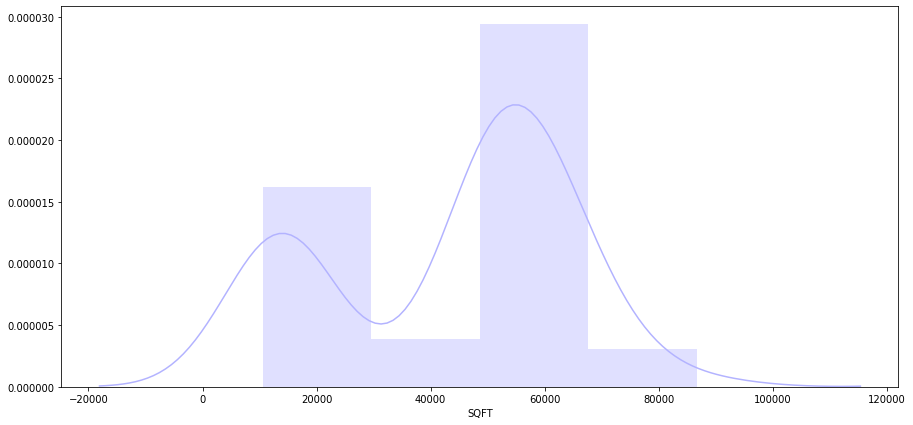

In [56]:
# Plot distribution of sales
plt.figure(figsize=(15,7))
plt.tight_layout()
sns.distplot(dfBuxtonData['SQFT'],color='#b3b3ff')

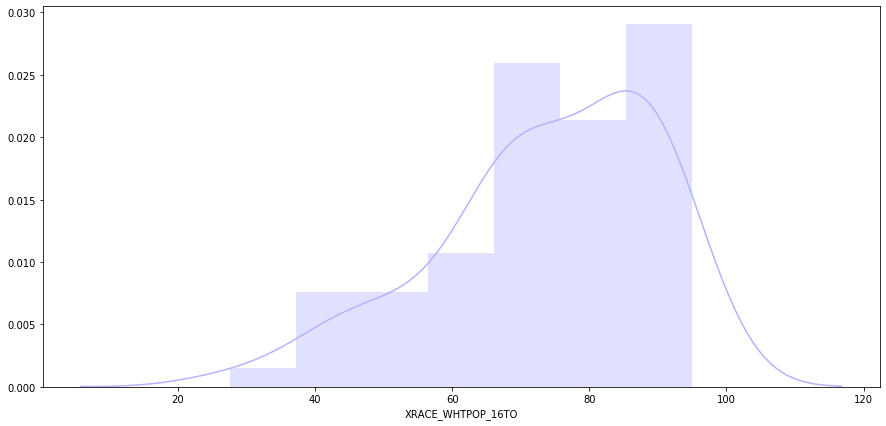

In [59]:
#  Plot distribution of sales
plt.figure(figsize=(15,7))
plt.tight_layout()
sns.distplot(dfBuxtonData['XRACE_WHTPOP_16TO'],color='#b3b3ff')

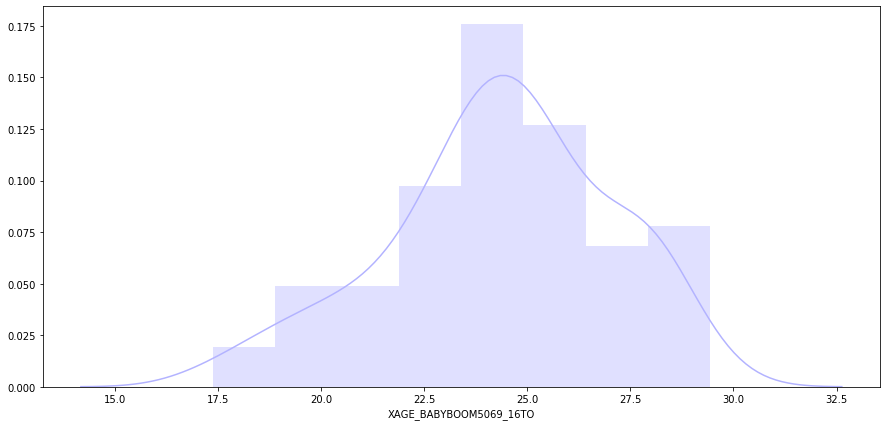

In [62]:
# Plot distribution of sales
plt.figure(figsize=(15,7))
plt.tight_layout()
sns.distplot(dfBuxtonData['XAGE_BABYBOOM5069_16TO'],color='#b3b3ff')

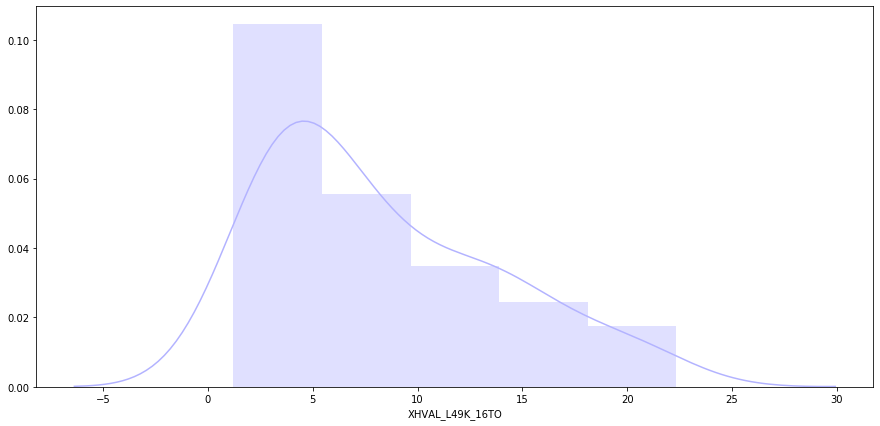

In [65]:
# Plot distribution of sales
plt.figure(figsize=(15,7))
plt.tight_layout()
sns.distplot(dfBuxtonData['XHVAL_L49K_16TO'],color='#b3b3ff')

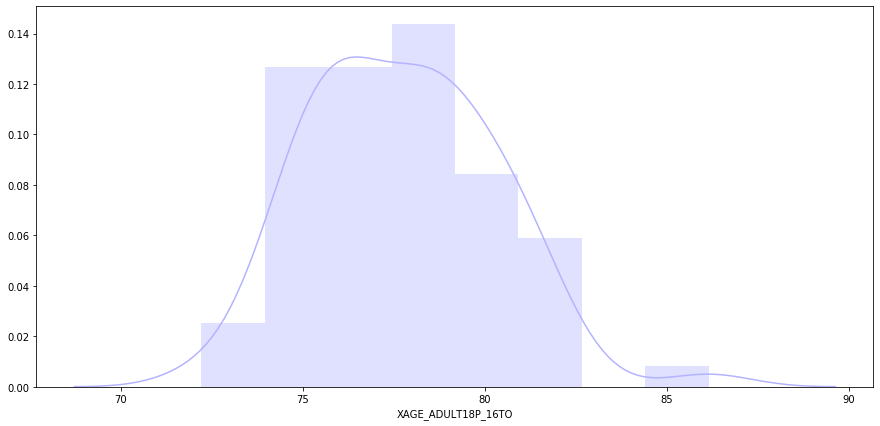

In [68]:
#  Plot distribution of sales
plt.figure(figsize=(15,7))
plt.tight_layout()
sns.distplot(dfBuxtonData['XAGE_ADULT18P_16TO'],color='#b3b3ff')